<a href="https://colab.research.google.com/github/hanieranjbar/snappfood_task/blob/main/1stpythontaskEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

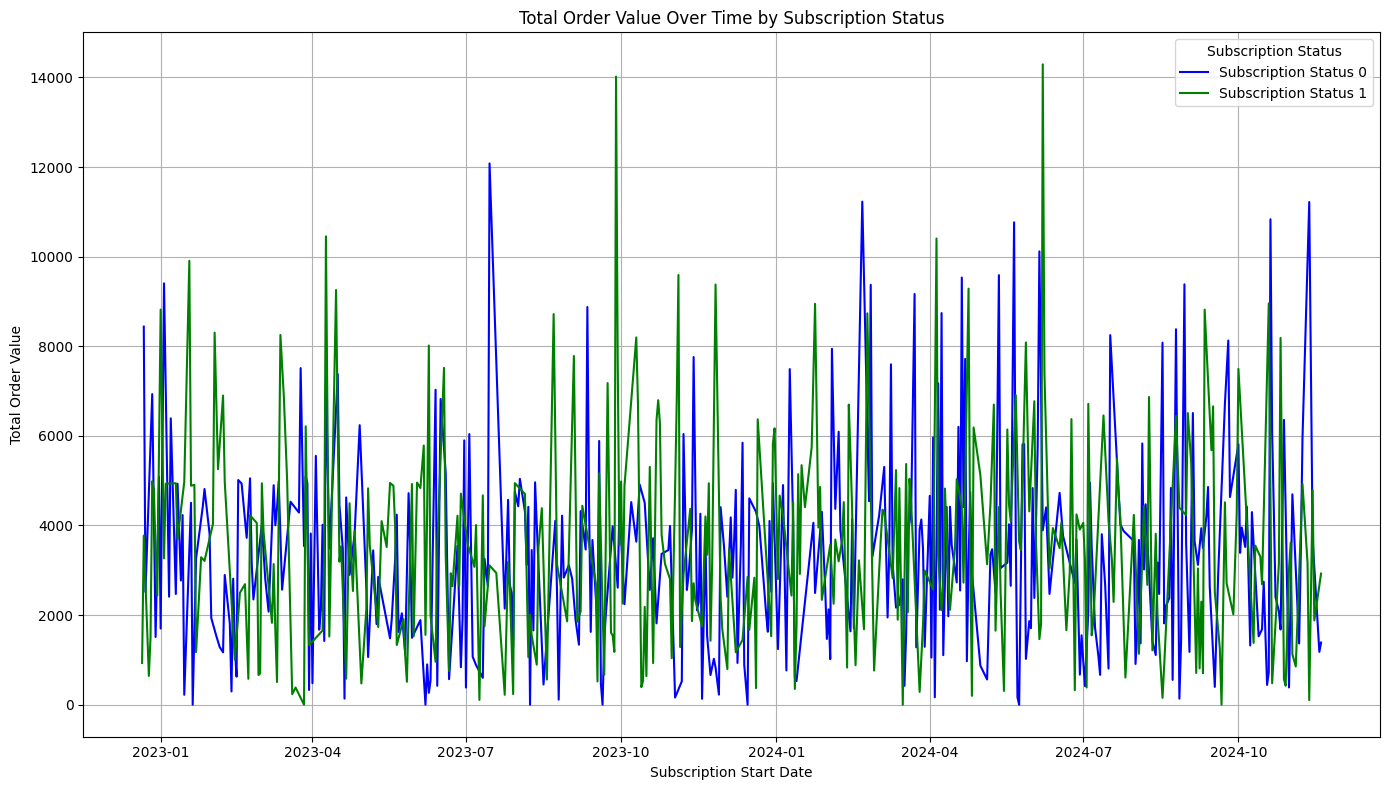

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Group by subscription_start and calculate metrics for status 0
metrics_0 = data_0.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Group by subscription_start and calculate metrics for status 1
metrics_1 = data_1.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Plot the data
plt.figure(figsize=(14, 8))

# Plot for subscription_status = 0
sns.lineplot(
    data=metrics_0,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 0',
    color='blue'
)

# Plot for subscription_status = 1
sns.lineplot(
    data=metrics_1,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 1',
    color='green'
)

# Add labels and title
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.title('Total Order Value Over Time by Subscription Status')
plt.legend(title='Subscription Status')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


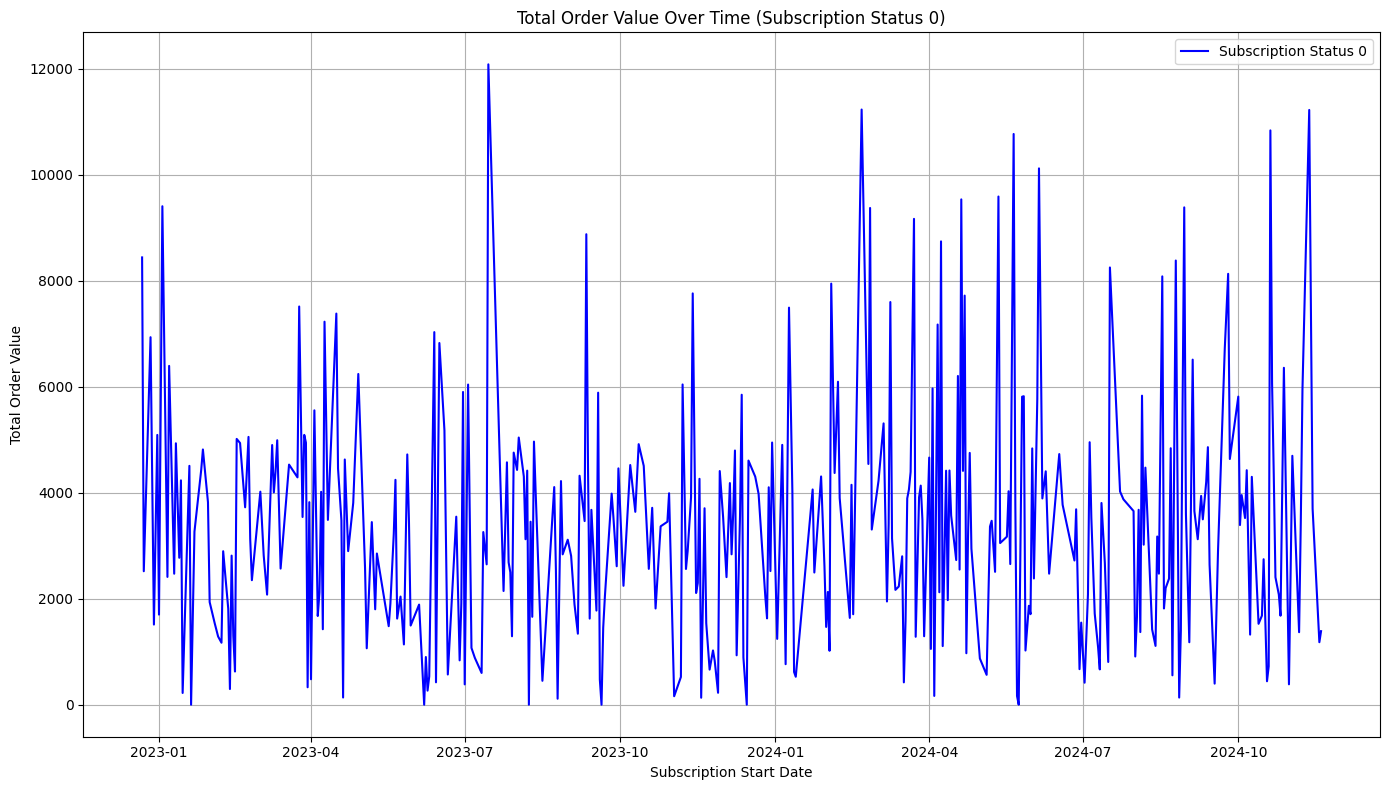

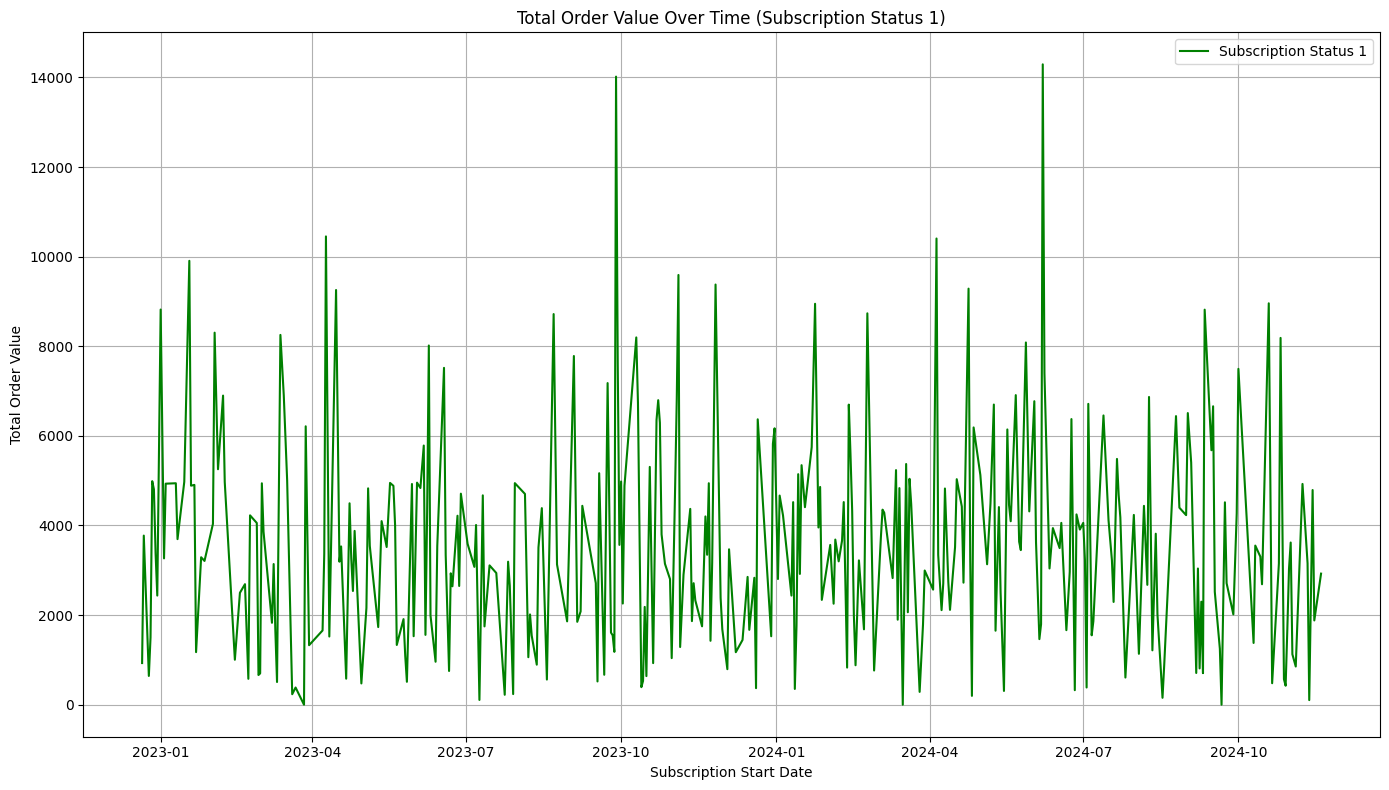

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Group by subscription_start and calculate metrics for status 0
metrics_0 = data_0.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Group by subscription_start and calculate metrics for status 1
metrics_1 = data_1.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Plot the data for subscription_status = 0
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=metrics_0,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 0',
    color='blue'
)

# Add labels and title for subscription_status = 0
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.title('Total Order Value Over Time (Subscription Status 0)')
plt.grid(True)

# Show the plot for subscription_status = 0
plt.tight_layout()
plt.show()

# Plot the data for subscription_status = 1
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=metrics_1,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 1',
    color='green'
)

# Add labels and title for subscription_status = 1
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.title('Total Order Value Over Time (Subscription Status 1)')
plt.grid(True)

# Show the plot for subscription_status = 1
plt.tight_layout()
plt.show()


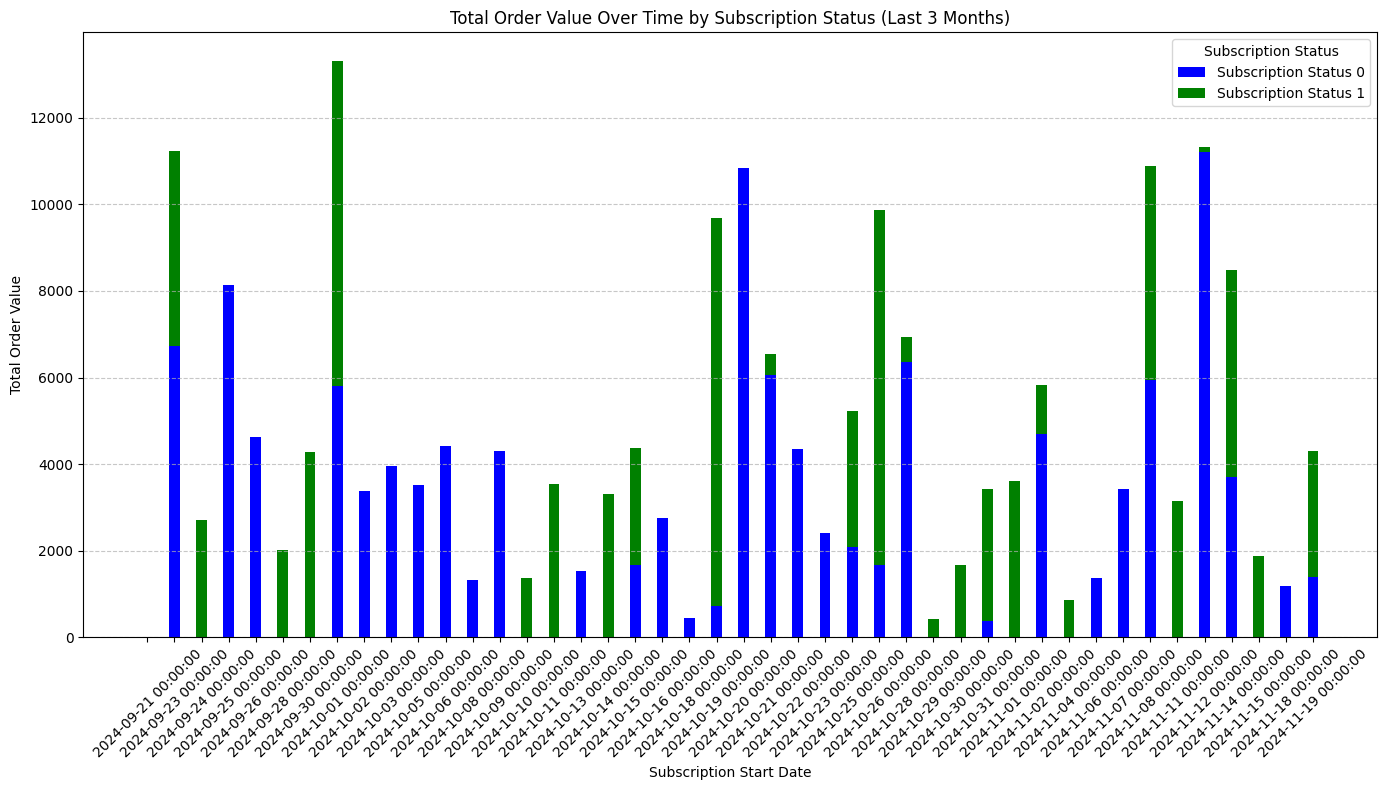

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for the last 3 months
three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
data = data[data['subscription_start'] >= three_months_ago]

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Group by subscription_start and calculate metrics for status 0
metrics_0 = data_0.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Group by subscription_start and calculate metrics for status 1
metrics_1 = data_1.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Merge the metrics for plotting
merged_metrics = pd.merge(metrics_0, metrics_1, on='subscription_start', how='outer', suffixes=('_0', '_1')).fillna(0)

# Plot the data as a bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.4

# Bar positions
x = merged_metrics['subscription_start']
x_indexes = range(len(x))

# Plot bars for subscription_status = 0
plt.bar(x_indexes, merged_metrics['total_order_value_0'], width=bar_width, label='Subscription Status 0', color='blue')

# Plot bars for subscription_status = 1 on top of the previous bars
plt.bar(x_indexes, merged_metrics['total_order_value_1'], width=bar_width, bottom=merged_metrics['total_order_value_0'], label='Subscription Status 1', color='green')

# Add labels and title
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.title('Total Order Value Over Time by Subscription Status (Last 3 Months)')
plt.xticks(ticks=x_indexes, labels=x, rotation=45)
plt.legend(title='Subscription Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


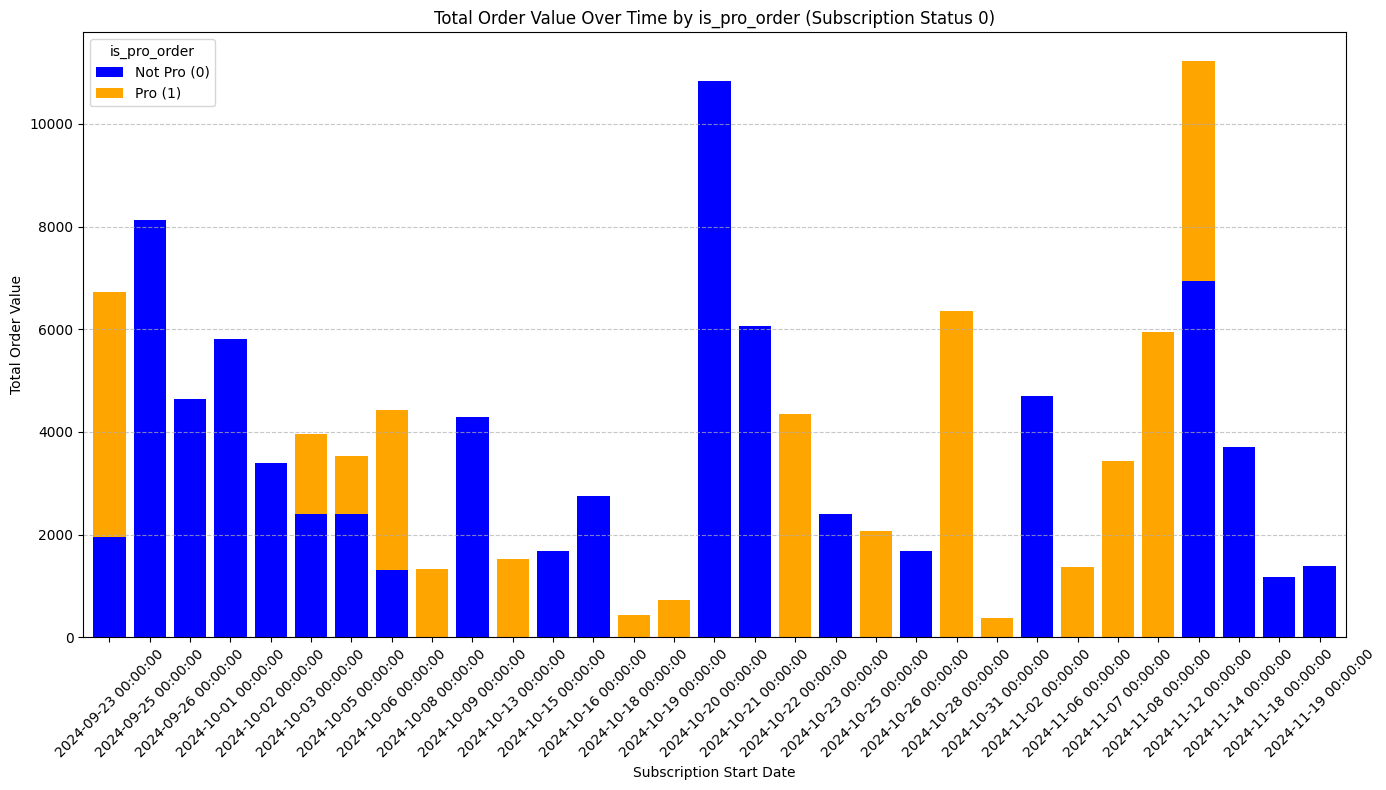

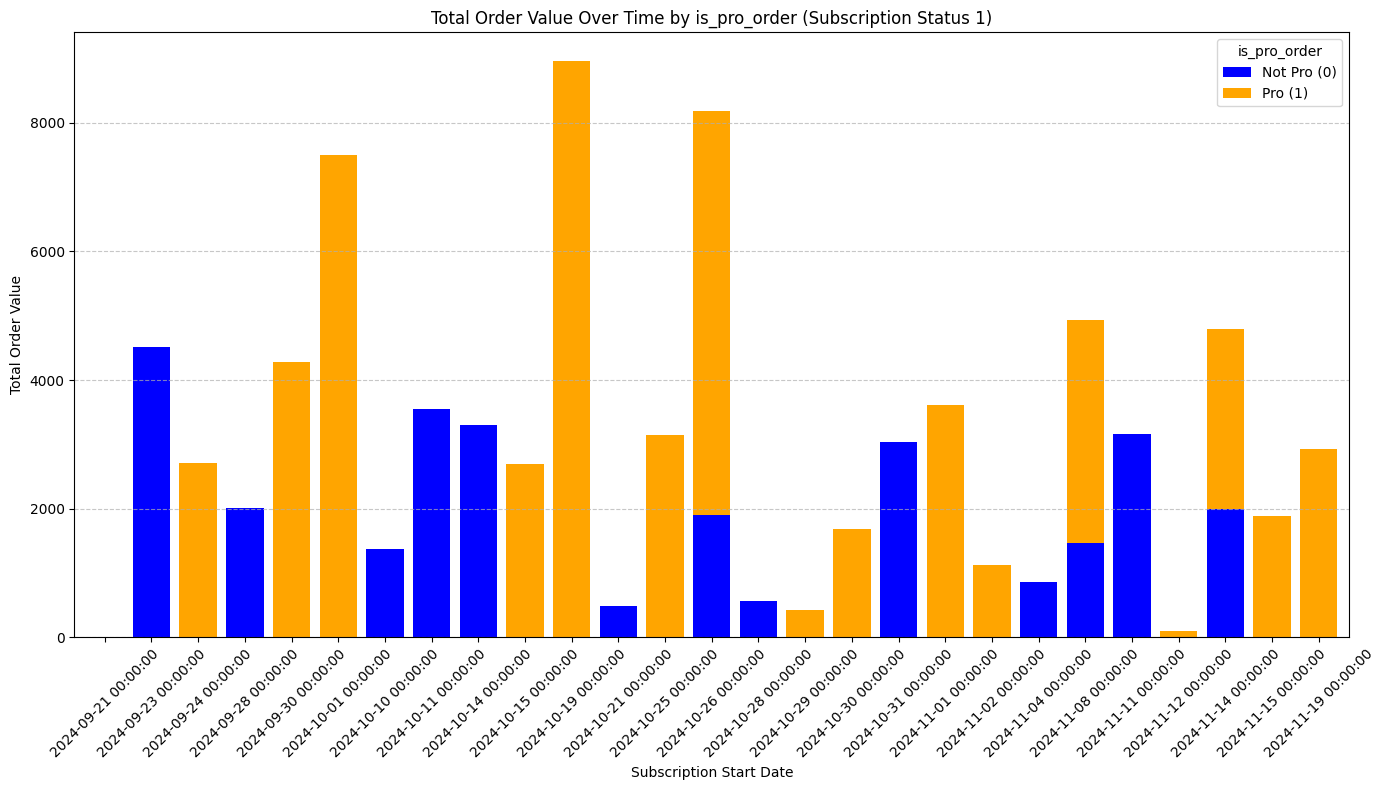

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for the last 3 months
three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
data = data[data['subscription_start'] >= three_months_ago]

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Group by subscription_start and is_pro_order for status 0
metrics_0 = data_0.groupby(['subscription_start', 'is_pro_order']).agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Group by subscription_start and is_pro_order for status 1
metrics_1 = data_1.groupby(['subscription_start', 'is_pro_order']).agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Pivot data for plotting stacked bar charts
metrics_0_pivot = metrics_0.pivot(index='subscription_start', columns='is_pro_order', values='total_order_value').fillna(0)
metrics_1_pivot = metrics_1.pivot(index='subscription_start', columns='is_pro_order', values='total_order_value').fillna(0)

# Plot for subscription_status = 0
plt.figure(figsize=(14, 8))
metrics_0_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(14, 8),
    width=0.8,
    ax=plt.gca()
)
plt.title('Total Order Value Over Time by is_pro_order (Subscription Status 0)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for subscription_status = 1
plt.figure(figsize=(14, 8))
metrics_1_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(14, 8),
    width=0.8,
    ax=plt.gca()
)
plt.title('Total Order Value Over Time by is_pro_order (Subscription Status 1)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
